In [24]:
import re
import pandas as pd

path = "WhatsApp Chat with DS students.txt"
f = open(path,'r',encoding = 'utf-8')
data = f.read()
print(type(data))


<class 'str'>


In [25]:
data

'07/10/2021, 13:36 - Srividya Shenoy //DS created group "🔥DS students🔥"\n07/10/2021, 13:36 - You were added\n29/10/2022, 08:01 - Shruthi //DS changed this group\'s icon\n29/10/2022, 09:31 - Amrit //Ds: Reminder, all interested people fill the form by today 4. \nOnly 6 people have filled so far\n29/10/2022, 09:52 - +91 6363 068 637: A college dance squad is being formed by the department of art and culture; interested students should fill out the form.\n\nhttps://forms.gle/fYVhtsaT1DZdTAQZ8\n29/10/2022, 09:52 - +91 6363 068 637: A college singers choir is being formed by the department of art and culture; interested students should fill out the form.\n\n\nhttps://forms.gle/8FYF7JkJq9f5gXh97\n29/10/2022, 09:52 - +91 6363 068 637: A college drama/skit squad is being formed by the department of art and culture; interested students should fill out the form.\n\n\nhttps://forms.gle/Xno7Bhmsm1KDkY8GA\n29/10/2022, 09:52 - +91 6363 068 637: A college instrumental squad is being formed by the dep

In [38]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

#pass the pattern and data to split it to get the list of messages
messages = re.split(pattern, data)[1:]
#extract all dates
dates = re.findall(pattern, data)

#create dataframe
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M  - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()



,user_message,date
0,"Srividya Shenoy //DS created group ""🔥DS studen...",2021-10-07 13:36:00
1,You were added\n,2021-10-07 13:36:00
2,Shruthi //DS changed this group's icon\n,2022-10-29 08:01:00
3,"Amrit //Ds: Reminder, all interested people fi...",2022-10-29 09:31:00
4,+91 6363 068 637: A college dance squad is bei...,2022-10-29 09:52:00


In [45]:
users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)

In [49]:
df

,date,user,message
0,2021-10-07 13:36:00,group_notification,"Srividya Shenoy //DS created group ""🔥DS studen..."
1,2021-10-07 13:36:00,group_notification,You were added\n
2,2022-10-29 08:01:00,group_notification,Shruthi //DS changed this group's icon\n
3,2022-10-29 09:31:00,Amrit //Ds,"Reminder, all interested people fill the form ..."
4,2022-10-29 09:52:00,+91 6363 068 637,A college dance squad is being formed by the d...
...,...,...,...
3515,2024-05-20 20:07:00,+91 95395 03518,<Media omitted>\n
3516,2024-05-20 21:44:00,Amrit //Ds,<Media omitted>\n
3517,2024-05-20 22:45:00,Amrit //Ds,<Media omitted>\n
3518,2024-05-20 22:45:00,Amrit //Ds,<Media omitted>\n


In [50]:
#Extract multiple columns from the Date Column
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [51]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2021-10-07 13:36:00,group_notification,"Srividya Shenoy //DS created group ""🔥DS studen...",2021-10-07,2021,10,October,7,Thursday,13,36,13-14
1,2021-10-07 13:36:00,group_notification,You were added\n,2021-10-07,2021,10,October,7,Thursday,13,36,13-14
2,2022-10-29 08:01:00,group_notification,Shruthi //DS changed this group's icon\n,2022-10-29,2022,10,October,29,Saturday,8,1,8-9
3,2022-10-29 09:31:00,Amrit //Ds,"Reminder, all interested people fill the form ...",2022-10-29,2022,10,October,29,Saturday,9,31,9-10
4,2022-10-29 09:52:00,+91 6363 068 637,A college dance squad is being formed by the d...,2022-10-29,2022,10,October,29,Saturday,9,52,9-10


In [52]:
df.shape[0]

3520

In [53]:
#Total Number of words
words = []
for message in df['message']:
  words.extend(message.split())

print(len(words))

34493


In [54]:
#Number of Media Files shared
df[df['message'] == '<Media omitted>\n'].shape[0]

782

In [55]:
!pip install urlextract

#Number of Links Shared
from urlextract import URLExtract
extract = URLExtract()

links = []
for message in df['message']:
    links.extend(extract.find_urls(message))

print(len(links))

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for urlextract from https://files.pythonhosted.org/packages/cb/cb/82ef2994dec66351aaffa45061f30051b6b557bf592952f14657f38b6e43/urlextract-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for uritools from https://files.pythonhosted.org/packages/e6/17/5a4510d9ca9cc8be217ce359eb54e693dca81cf4d442308b282d5131b17d/uritools-4.0.3-py3-none-any.whl.metadata


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


149


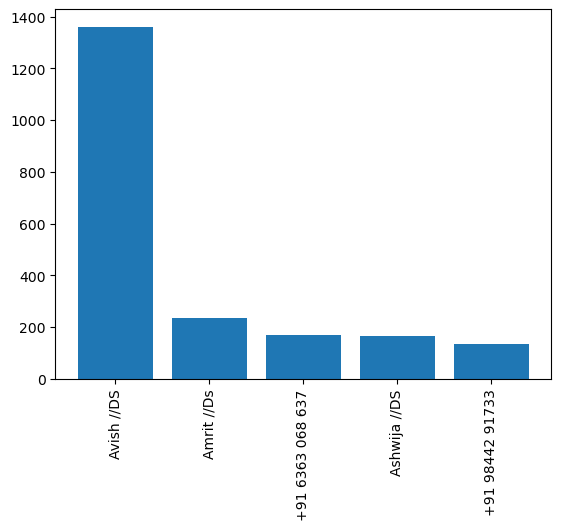

In [56]:
import matplotlib.pyplot as plt

x = df['user'].value_counts().head()
user_names = x.index
msg_count = x.values

plt.bar(user_names, msg_count)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
new_df = round(((df['user'].value_counts() / df.shape[0]) * 100), 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})

new_df.head()

,percent,count
0,Avish //DS,38.64
1,Amrit //Ds,6.70
2,+91 6363 068 637,4.77
3,Ashwija //DS,4.72
4,+91 98442 91733,3.84


In [58]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.2 kB ? eta -:--:--

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [59]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [64]:
import emoji
from collections import Counter

emojis = []
for message in df['message']:
  emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🔥,45
1,🥳,38
2,🏼,37
3,😂,37
4,❤,31
...,...,...
111,🔧,1
112,🔍,1
113,🙈,1
114,😁,1
